In [1]:
from ConvDiffSolverFunc import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize
######################################################################
# Plot configurations
# mpl.style.use('classic')
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['lines.dashed_pattern'] = [6, 6]
mpl.rcParams['lines.dashdot_pattern'] = [3, 5, 1, 5]
mpl.rcParams['lines.dotted_pattern'] = [1, 3]
mpl.rcParams['lines.scale_dashes'] = False

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
######################################################################
%matplotlib inline

In [2]:
pv_exp=[0.06, 0.24, 0.47, 0.59, 0.71, 0.94, 1.00, 1.06, 1.12, 1.18, 1.29, 1.41, 
      1.53, 1.82, 2.24, 2.71, 2.94, 3.18]
cout_exp=[0, 0, 0, 0, 0.043839945, 0.23571823, 0.393948895, 0.579304041,
       0.682607092, 0.789883458, 0.920350084, 0.955819637, 0.983220378, 1.001877569, 0.997183646, 
       0.997183646, 1.001877569, 1.001877569]

In [3]:
bc      = np.rec.array([(1.), (0.)], 
          dtype=[('bcL','float64'), ('bcR','float64'),])

numpar  = np.rec.array([(1000), (10), (3.5), (0), (0), (0), (0)], 
          dtype=[('nx','int64'), ('alfa1','float64'), ('tstop','float64'), 
                ('dx','float64'), ('dt','float64'),
                ('alfa3','float64'), ('nt','int64'),])

physpar = np.rec.array([(10)], 
          dtype=[('peclet','float64')])

varspatial  = np.rec.array([(np.zeros([numpar.nx,1])), (np.zeros([numpar.nx,1]))], 
          dtype=[('c_old','float64'), ('c','float64'), ])



numpar.dx      = 1/float(numpar.nx)
numpar.dt      = numpar.alfa1*numpar.dx
numpar.alfa3   = numpar.dt/(physpar.peclet*(numpar.dx**2))
numpar.nt      = int(numpar.tstop/numpar.dt)#+1e-6 

pv = np.arange(0.0, numpar.tstop+numpar.dt, numpar.dt)
vartemporal = np.rec.array([(pv), (np.zeros([len(pv)])), (np.zeros([len(pv)]))], 
          dtype=[('pv','float64'), ('cout','float64'),('time','float64') ])

<function matplotlib.pyplot.tight_layout>

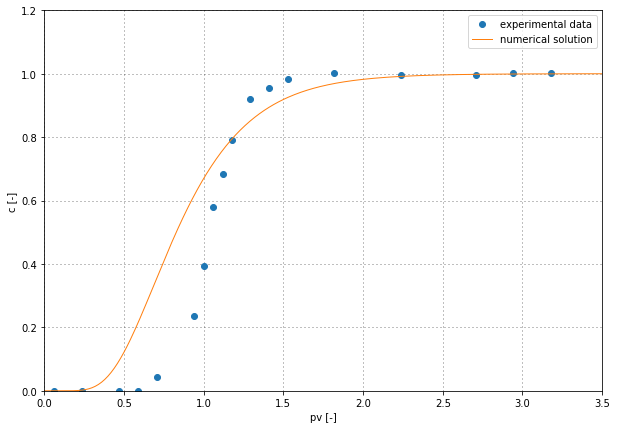

In [4]:
varspatial, vartemporal = ConvDiffsolver(numpar, physpar, bc)
plt.figure(figsize=[10,7])
plt.plot(pv_exp,cout_exp,'o',label='experimental data')
plt.plot(vartemporal.pv,vartemporal.cout,label='numerical solution')
plt.grid()
plt.xlabel('pv [-]')
plt.ylabel('c [-]')
plt.legend()
plt.tight_layout

In [5]:
def misfit(x):
    physpar.peclet = x
    varspatial, vartemporal = ConvDiffsolver(numpar, physpar, bc)
    cout_est =  0 * np.ndarray(len(pv_exp))
    r    = 0
    for pv in pv_exp:
        dif = abs(vartemporal.pv-pv)
        a= float(vartemporal.cout[np.where(dif == dif.min())])
        cout_est[r] = a
        r = r + 1
    s = sum((cout_exp-cout_est)**2)
    return s

In [6]:
es = optimize.least_squares(misfit, [10.])
physpar.peclet = es.x
print ('estimated peclet number is %s' % physpar.peclet)

estimated peclet number is 142.714349046


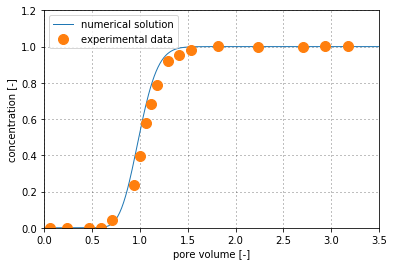

In [7]:
varspatial, vartemporal = ConvDiffsolver(numpar, physpar, bc)
plt.plot(vartemporal.pv,vartemporal.cout,label='numerical solution')
plt.plot(pv_exp,cout_exp,'o',markersize=10,label='experimental data')

plt.xlabel('pore volume [-]')
plt.ylabel('concentration [-]')
plt.grid() 
plt.tight_layout
plt.legend()

In [8]:
print ('peclet number is %s' % es.x)

peclet number is [ 142.71434905]
